In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_df = pd.read_csv("bank_data.csv", sep=',')
bank_df.head(5)


,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [3]:
bank_df.describe()


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [6]:
print("Standard Deviations : \n", bank_df[["age", "income", "children"]].std())

Standard Deviations : 
 age            14.424947
income      12899.468246
children        1.056752
dtype: float64


In [8]:
bank_df.groupby("married").mean()

,age,income,children
married,,,
NO,42.186275,27674.627108,1.083333
YES,42.502525,27446.451515,0.974747


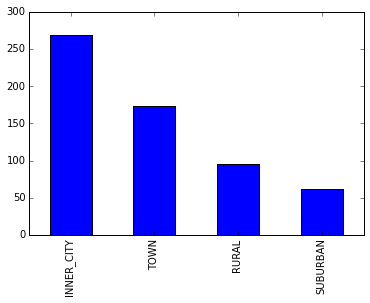

In [13]:
bank_df["region"].value_counts().plot(kind='bar')

In [15]:
bank_df.groupby("mortgage").describe()

age    children        income
mortgage                                            
NO       count  391.000000  391.000000    391.000000
         mean    42.565217    1.069054  27662.194680
         std     14.461805    1.073140  13199.249366
         min     18.000000    0.000000   7549.380000
         25%     30.000000    0.000000  17144.350000
         50%     43.000000    1.000000  25127.700000
         75%     54.500000    2.000000  36434.600000
         max     67.000000    3.000000  63130.100000
YES      count  209.000000  209.000000    209.000000
         mean    42.076555    0.904306  27265.553158
         std     14.384951    1.019252  12345.988391
         min     18.000000    0.000000   5014.210000
         25%     31.000000    0.000000  17866.900000
         50%     41.000000    1.000000  24763.300000
         75%     56.000000    2.000000  34852.300000
         max     67.000000    3.000000  60747.500000

In [17]:
zscore = lambda x: ((x - x.mean()) / x.std()) if (x.dtypes==np.float64 or x.dtypes==np.int64) else x
zbank = bank_df.copy()
zbank.apply(zscore).head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.388563,-0.773523,-0.011040,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,-0.166032,0.198541,1.881551,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.596536,-0.848766,-0.957336,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,-1.344546,-0.554180,1.881551,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,1.012482,1.787071,-0.957336,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [22]:
normalize = lambda x: ((x - x.min()) / (x.max() - x.min()))
bank_num = bank_df[["age","income","children"]]
bank_num.apply(normalize).head()

,age,income,children
0,0.612245,0.215634,0.333333
1,0.448980,0.431395,1.000000
2,0.673469,0.198933,0.000000
3,0.102041,0.264320,1.000000
4,0.795918,0.783987,0.000000
